# Boston House Prices Dataset 
The dataset includes the following attributes:
1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. NOX: Nitric oxides concentration (parts per 10 million).
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built prior to 1940.
8. DIS: Weighted distances to five Boston employment centres.
9. RAD: Index of accessibility to radial highways.
10. TAX: Full-value property-tax rate per $10,000.
11. PTRATIO: Pupil-teacher ratio by town.
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: % lower status of the population.
14. MEDV: Median value of owner-occupied homes in $1000's.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Load the CSV file
file_path = '/Users/jiangjiang/Downloads/housing.csv'
housing_data = pd.read_csv(file_path, header=None, names=columns, sep=r'\s+')

# Check for missing values
missing_values = housing_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)
print(housing_data.head())


Missing Values in Each Column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


1. Create a correlation heatmap to identify key features affecting the target variable MEDV (median home value).
Correlation heatmap shows how each variable in the dataset is related to every other variable. Correlation values range from -1 to 1.
- 1 indicates perfect positive correlation
- -1 indicates perfect negative correlation
- 0 indicates no correlation

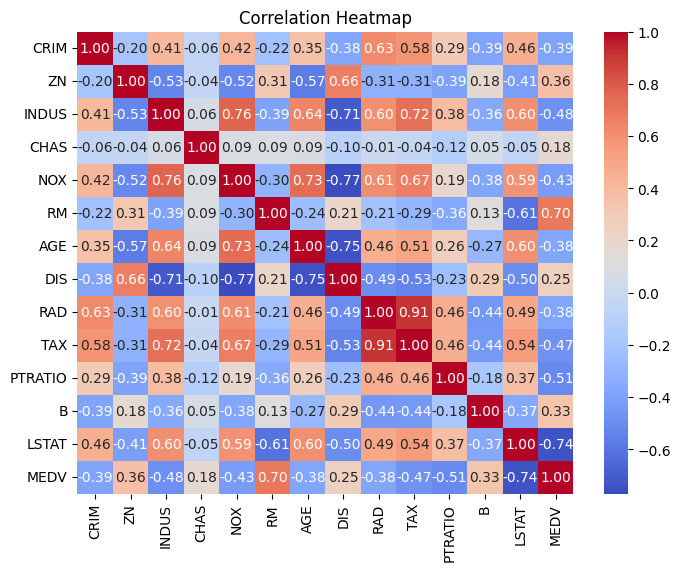


Significant Correlations with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [25]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Summarize the most significant correlations with MEDV
print("\nSignificant Correlations with MEDV:")
print(correlation_matrix['MEDV'].sort_values(ascending=False))


2. Apply Principal Component Analysis (PCA) and create a 2D plot to visualize data clusters or patterns.
- PCA is a dimensionality reduction technique that transforms a dataset with many features into a smaller set of components. This allows us to visualize patterns, cluster, or trends in the data that might not be evident in the original feature space.

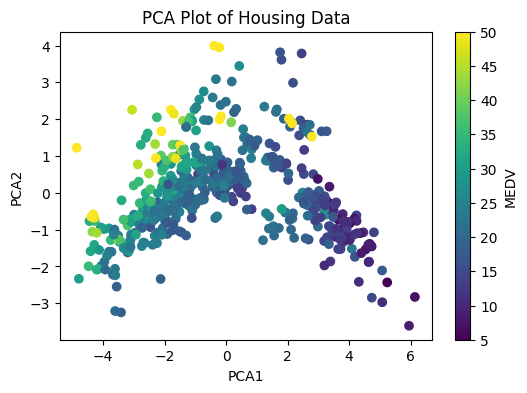

In [26]:
# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_data.drop('MEDV', axis=1))

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['MEDV'] = housing_data['MEDV']

# Plot the PCA components
plt.figure(figsize=(6, 4))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['MEDV'], cmap='viridis')
plt.colorbar(label='MEDV')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Plot of Housing Data')
plt.show()


3. Run a simple K-means clustering algorithm to check for natural groupings among the housing records, potentially identifying clusters like neighborhoods. Visualize clusters in 2D using PCA components.
- K-means helps identify natural groupings in the data, which can reveal insights such as different types of neighborhoods based on housing characteristics. By clustering the data, we can discover patterns and understand the structure of the data without any prior labels/classifications.

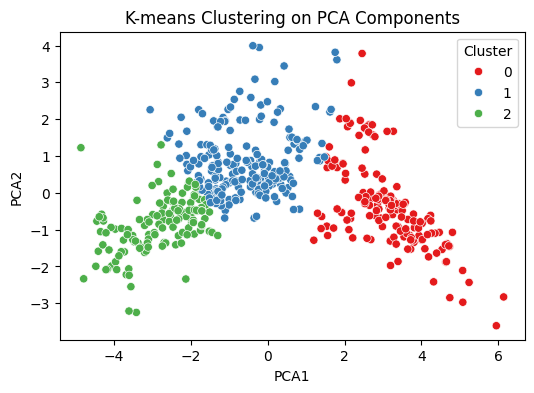


Cluster Centers (in PCA space):
[[ 3.10441829 -0.36393198]
 [-0.56416196  0.82301248]
 [-2.79754631 -0.85501123]]


In [30]:
# Run K-means clustering on the PCA components
kmeans = KMeans(n_clusters=3)  
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

# Visualize the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-means Clustering on PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Interpret patterns observed in the clusters
print("\nCluster Centers (in PCA space):")
print(kmeans.cluster_centers_)
